In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/depression/ALLFsubject4.npy
/kaggle/input/depression/atsubject4.npy


# 1 Import the necessary libraries

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2 Loading the features and Targets

In [3]:
Features = np.load('/kaggle/input/depression/ALLFsubject4.npy')
Targets = np.load('/kaggle/input/depression/atsubject4.npy').ravel()

# 3 Split the data into training and testing sets

In [4]:
X_train,X_test, y_train, y_test = train_test_split(Features,Targets,test_size=0.8,random_state=42)

# 4 KNN Classifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

# 5 Predict on the testing set

In [6]:
y_pred = knn.predict(X_test)

# 6 Calculate and print the accuracy

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8013047354368601


# 7 Plot the confusion matrix

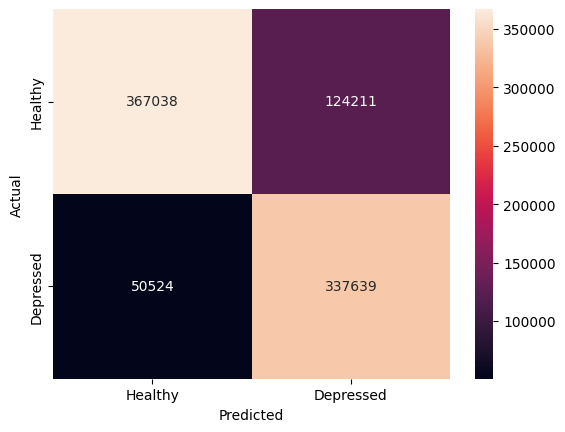

In [8]:
cm = confusion_matrix(y_test, y_pred)
class_names = ['Healthy','Depressed']
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 8 Scaling the confusion matrix

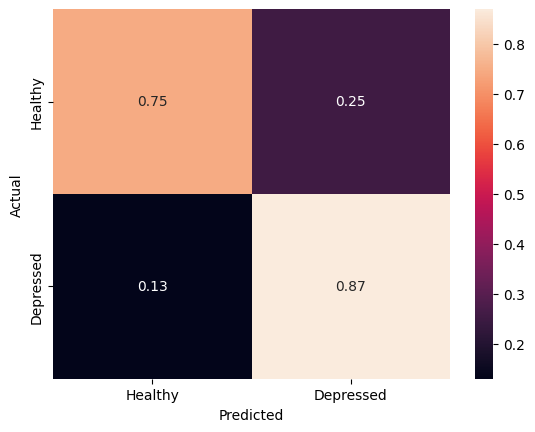

In [9]:
row_sums = cm.sum(axis=1, keepdims=True)
scaled_cm = cm / row_sums
class_names = ['Healthy','Depressed']
sns.heatmap(scaled_cm, annot=True, fmt=".2f", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()